In [16]:
from torchvision import transforms
import cv2, torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

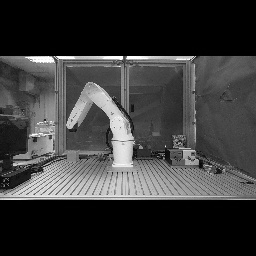

In [3]:
image_path = r"Y:\111\111033631_Yen\ARM\GAN_images\_010_010_010_shuffle_False_502_36\test\img_0002.jpg"

AB = Image.open(image_path).convert('L')
# # split AB image into A and B
w, h = AB.size
w2 = int(w / 2)
A = AB.crop((0, 0, w2, h))
B = AB.crop((w2, 0, w, h))
A

In [6]:
def get_tensor(image, size=256):
    # 定義變換管道
    transform = transforms.Compose([
        # transforms.Lambda(add_black_border_to_square_PIL),
        transforms.Grayscale(1),
        transforms.Resize((size, size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
        transforms.Lambda(lambda x: x.unsqueeze(0)),
    ])
    return transform(image)

In [8]:
A_tensor = get_tensor(A)

In [14]:
def reverse_transform(transformed_image, original_size=None):
    """
    Reverses the transformations applied to the image and displays it.

    Parameters:
    - transformed_image (torch.Tensor): The transformed image tensor.
    - original_size (tuple): The original size of the image (height, width). Default is None.

    Returns:
    - None
    """
    # Step 1: Remove the extra dimension
    image_tensor = transformed_image.squeeze(0)

    # Step 2: Reverse normalization
    inverse_normalize = transforms.Normalize(
        mean=[-0.5 / 0.5], std=[1 / 0.5]
    )
    image_tensor = inverse_normalize(image_tensor)

    # Step 3: Convert the tensor to a NumPy array
    image_np = image_tensor.squeeze().numpy() * 255  # Scale back to [0, 255]
    image_np = image_np.astype(np.uint8)
    
    return image_np

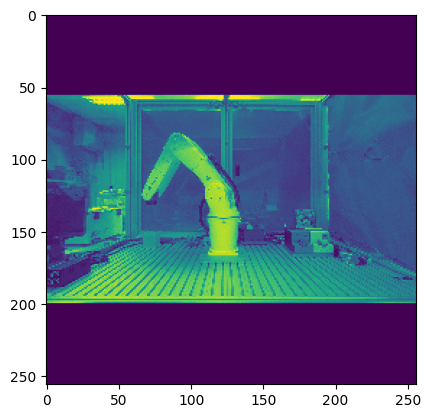

In [17]:
A_np = reverse_transform(A_tensor)
plt.imshow(A_np)